In [3]:
from tkinter import Image

import kagglehub
import pandas as pd

path = kagglehub.dataset_download("naderabdalghani/iam-handwritten-forms-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/amaljoe/.cache/kagglehub/datasets/naderabdalghani/iam-handwritten-forms-dataset/versions/1


In [124]:
import os
from tqdm.notebook import tqdm
import shutil
from PIL import Image
import numpy as np


dataset_path = path + '/data'
output_folder = 'raw_dataset'
folders = os.listdir(dataset_path)

image_path = ""

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

for folder in tqdm(folders[:40]):
    files = os.listdir(dataset_path + '/' + folder)
    for file in files:
        if file[-4:] != '.png':
            continue
        image_path = dataset_path + '/' + folder + '/' + file
        break
        img = Image.open(image_path)
        lines =  np.array(img)[400:1000].mean(axis=1)
        first_line = np.argmin(lines)
        img = img.crop((0, first_line + 400, img.width, img.height - 750))
        dest = output_folder + '/' + file
        img.save(dest)

  0%|          | 0/657 [00:00<?, ?it/s]

<Axes: >

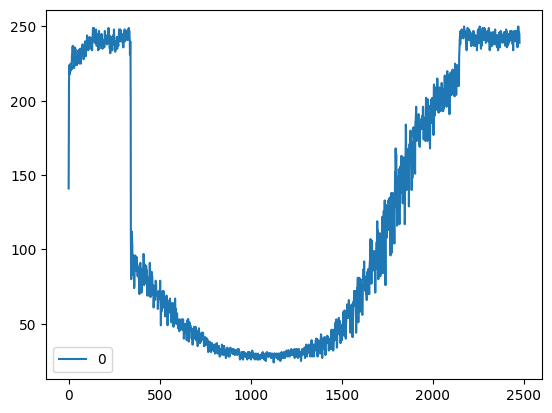

In [182]:
img = Image.open(image_path)
lines =  np.array(img)[400:1000].mean(axis=1)
first_line = np.argmin(lines)
first_line
pd.DataFrame(np.array(img)[first_line + 400]).plot()
# img.crop((0, first_line + 400, img.width, 1000))